In [1]:
#Observed Trend 1: Max temperatures appear to increase moving away from the poles 
#toward the equator, thus showing "it gets hotter."

#Observed Trend 2: Max wind speeds tend to be most extreme in northern hemishpere.

#Observed Trend#3: Humidity is likely to increase moving north in the northern hemisphere.

In [2]:
import json
import requests as req
from citipy import citipy
import numpy.random as random
import matplotlib.pyplot as plt
import pandas as pd
import csv
import kdtree
import os
import seaborn

In [3]:
class City:
    '''
    City wraps up the info about a city, including its name, coordinates,
    and belonging country.
    '''
    def __init__(self, city_name, country_code):
        self.city_name = city_name
        self.country_code = country_code

# load the city data up
#_current_dir, _current_filename = os.path.split(__file__)
_world_cities_csv_path = os.path.join('worldcities.csv')
_world_cities_kdtree = kdtree.create(dimensions=2)
WORLD_CITIES_DICT = {}

with open(_world_cities_csv_path, 'r') as csv_file:
    cities = csv.reader(csv_file)

    # discard the headers
    cities.__next__()

    # populate geo points into kdtree
    for city in cities:
        city_coordinate_key = (float(city[2]), float(city[3]))
        _world_cities_kdtree.add(city_coordinate_key)
        c = City(city[1], city[0])
        WORLD_CITIES_DICT[city_coordinate_key] = c

def nearest_city(latitude, longitude):
    nearest_city_coordinate = _world_cities_kdtree.search_nn((latitude, longitude, ))
    return WORLD_CITIES_DICT[nearest_city_coordinate[0].data]

In [4]:
apikey='cc8028c62f0742cf38eef5a866d89c64'
url = 'https://api.openweathermap.org/data/2.5/weather?q='

city_list=[]
cloudiness_list=[]
country_list=[]
date_list=[]
humidity_list=[]
lat_list=[]
long_list=[]
max_temp_list=[]
wind_speed_list=[]
request_list=[]

In [5]:
print('Beginning Data Retrieval')

print('------------------------')


for x in range(25):

    n_requests = 25
    long_random = random.randint(-180, 180, size=n_requests)
    lat_random= random.randint(-60,80, size=n_requests)

    zipped=zip(lat_random,long_random)

    for lat,lon in zipped:

        city=nearest_city(lat,lon)
        city__name=city.city_name
        country__code=city.country_code.upper()

        response=req.get(url + city__name +'&units=imperial'+'&APPID=' + apikey).json()
            
        try:
            temps=response['main']['temp_max']
            max_temp_list.append(temps)

            humidity=response['main']['humidity']
            humidity_list.append(humidity)

            cloudiness=response['clouds']['all']
            cloudiness_list.append(cloudiness)

            wind=response['wind']['speed']
            wind_speed_list.append(wind)
            
            date=response['dt']
            date_list.append(date)

            lat_list.append(lat)
            long_list.append(lon)

            city_list.append(city__name)
            country_list.append(country__code)
            
            print(url + city__name +'&units=imperial'+'&APPID=' + apikey)

        except:
            KeyError: 'main'
            KeyError: 'clouds'
            KeyError:  'wind'
            KeyError: 'temp_max'
            KeyError: 'humidity'
            KeyError: 'all'
            KeyError:'speed'
            KeyError:'dt'
            

Beginning Data Retrieval
------------------------
https://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=beloha&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=tlazazalca&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=leshukonskoye&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=cuiluan&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.

https://api.openweathermap.org/data/2.5/weather?q=port alfred&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=kumluca&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=lebu&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=tura&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=luderitz&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=manokwari&units=imperial&APPID=cc8028c62f0742c

https://api.openweathermap.org/data/2.5/weather?q=kumeny&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=aklavik&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=ibra&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=hofn&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=mokhsogollokh&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=husavik&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=puerto ayora&units=imperial&APPID=cc8028c62

https://api.openweathermap.org/data/2.5/weather?q=flinders&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=talas&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=vila franca do campo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=kazuno&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=mentougou&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=sitka&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=jamestown&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=punta arenas&units=imperial&APPID

https://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=caravelas&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=saldanha&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=ancud&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=dicabisagan&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=hermanus&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=miraflores&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=kapaa&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=imperial&APPID=cc8028c6

https://api.openweathermap.org/data/2.5/weather?q=new norfolk&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=rassvet&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=atambua&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=sistranda&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=dhola&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=khatanga&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=hilo&units=imperial&APPID=cc8028c62f0742cf38eef

https://api.openweathermap.org/data/2.5/weather?q=presidente medici&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=namibe&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=rikitea&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=hualmay&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=albany&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=suslovo&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=castro&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=ostrovnoy&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=chokurdakh&units=imperial&APPID=cc8028c62f074

https://api.openweathermap.org/data/2.5/weather?q=tasiilaq&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=atuona&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=yauya&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=lensk&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=faya&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=busselton&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=ribeira grande&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=hobart&units=imperial&APPID=cc8028c62f0742cf38eef5a866d89c64
https://api.openweathermap.org/data/2.5/weather?q=provideniya&units=imperial&APPID=cc8028c62f0742cf38ee

In [6]:
city_df=pd.DataFrame({'City':city_list,'Max Temp':max_temp_list,
                      'Humidity':humidity_list,
                      'Cloudiness':cloudiness_list,
                      'Wind Speed':wind_speed_list,
                      'Latitude':lat_list,
                      'Longitude':long_list,
                      'Country':country_list,
                     'Date':date_list})

city_df.count()

City          570
Cloudiness    570
Country       570
Date          570
Humidity      570
Latitude      570
Longitude     570
Max Temp      570
Wind Speed    570
dtype: int64

In [7]:
city_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,hobart,40,AU,1515456000,55,-57,154,66.20,17.22
1,luderitz,0,NA,1515452400,55,-38,-3,64.40,28.86
2,beloha,92,MG,1515457069,95,-28,44,73.35,16.80
3,tlazazalca,75,MX,1515451560,53,20,-102,71.60,6.93
4,leshukonskoye,92,RU,1515457071,91,69,48,25.78,5.39
5,cuiluan,44,CN,1515457072,65,48,128,-5.14,6.73
6,rikitea,80,PF,1515457074,100,-49,-124,75.33,13.33
7,arraial do cabo,75,BR,1515452400,88,-46,-23,77.00,13.87
8,oranjemund,0,NA,1515457076,95,-29,15,61.15,27.87
9,kapaa,75,US,1515455760,69,22,-172,77.00,11.41


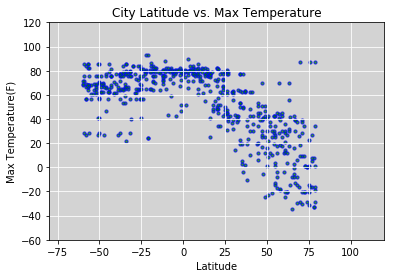

In [8]:
plt.grid(True,color='white')
plt.scatter(city_df['Latitude'],city_df['Max Temp'],
            marker='o',facecolors='green',alpha=0.75,edgecolors='blue',s=10)

plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.xlim(-80,120)
plt.ylim(-60,120)

ax=plt.gca()
ax.set_facecolor('lightgray')

plt.show()

In [9]:
print(len(lat_list))

570


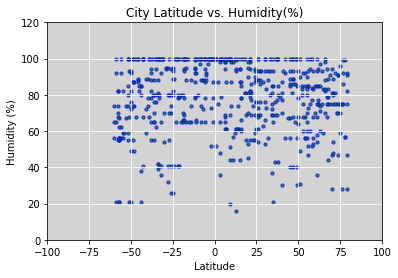

In [10]:
plt.grid(True,color='white')
plt.scatter(city_df['Latitude'],city_df['Humidity'],
            marker='o',facecolors='green',alpha=0.75,edgecolors='blue',s=10)

plt.title('City Latitude vs. Humidity(%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-100,100)
plt.ylim(0,120)

ax=plt.gca()
ax.set_facecolor('lightgray')

plt.show()

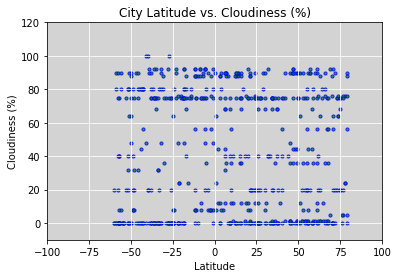

In [11]:
plt.grid(True,color='white')
plt.scatter(city_df['Latitude'],city_df['Cloudiness'],
            marker='o',facecolors='green',alpha=0.75,edgecolors='blue',s=10)

plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlim(-100,100)
plt.ylim(-10,120)

ax=plt.gca()
ax.set_facecolor('lightgray')

plt.show()

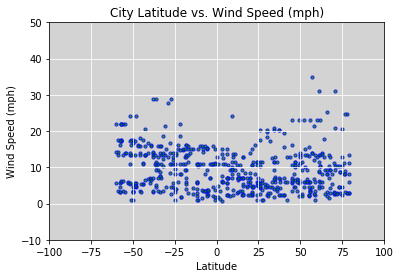

In [12]:
plt.grid(True,color='white')
plt.scatter(city_df['Latitude'],city_df['Wind Speed'],
            marker='o',s=10,facecolors='green',alpha=0.75,edgecolors='blue')

plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlim(-100,100)
plt.ylim(-10,50)

ax=plt.gca()
ax.set_facecolor('lightgray')

plt.show()